<a href="https://colab.research.google.com/github/parsashokrollahi/machinelearning2023/blob/main/Project%202_parsa-Shokrollahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1go2ZmThhZiKW5domdfIYNex-MtX8P6iy

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1go2ZmThhZiKW5domdfIYNex-MtX8P6iy
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 26.2MB/s]


In [ ]:
#practice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Perceptron.csv')
from sklearn.model_selection import train_test_split
x = df[["x1","x2"]]
y = df[["y"]]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)


def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1/(1+np.exp(-x))


def tanh(x):
    return np.tanh(x)


def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))


def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat >= t, 1, 0)
    return np.mean(y == y_hat)
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/Perceptron.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y






array([-1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1

In [ ]:
#practice
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv('/content/Perceptron.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Perceptron classifier
clf = Perceptron()

# Train the perceptron
clf.fit(X_train, y_train)

# Accuracy on train and test data
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Accuracy on train set: {train_accuracy}")
print(f"Accuracy on test set: {test_accuracy}")

# Convert y_train to integer type
y_train = y_train.astype(np.int)

# Plotting decision boundary
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary - Perceptron')
plt.show()

FileNotFoundError: ignored

In [ ]:
#Q1
import pandas as pd
data = pd.read_csv("/content/Perceptron.csv")
data

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
x = data.iloc[:, :-1].values # x is features
y = data.iloc[:, -1].values  # y is target
# Transforming y values from {-1, 1} to {0, 1}
y = np.where(y == -1, 0, 1)
y



array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
model = Perceptron()

# Train the perceptron with the new threshold
model.fit(x_train, y_train)
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)

print(f"Accuracy on train set with new threshold: {train_accuracy}")
print(f"Accuracy on test set with new threshold: {test_accuracy}")
# Convert y_test to integer type
y_test = y_test.astype(np.int)



Accuracy on train set with new threshold: 1.0
Accuracy on test set with new threshold: 1.0


<ipython-input-5-61397b07d48b>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = y_test.astype(np.int)


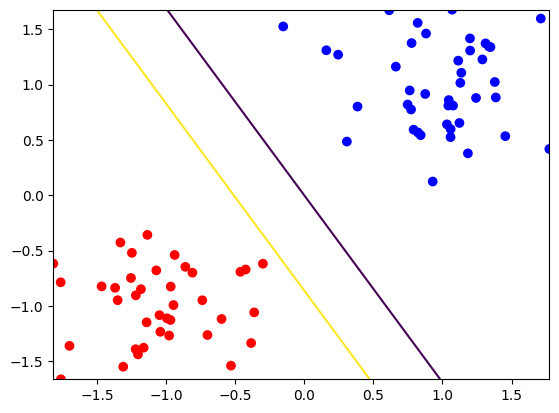

In [ ]:
x1_min, x2_min = x_test.min(0)
x1_max, x2_max = x_test.max(0)
n=400
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)
xm = np.stack((x1m.flatten(), x2m.flatten()),axis=1)
ym = model.decision_function(xm)
colors = np.array(['blue', 'red'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors[y_test])
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[0,1])
plt.show()


Dimensions of the training features: (320, 2)
Dimensions of the training target: (320,)
Dimensions of the testing features: (80, 2)
Dimensions of the testing target: (80,)
Iter=0, Loss=0.213
Iter=10, Loss=0.1818
Iter=20, Loss=0.1551
Iter=30, Loss=0.1325
Iter=40, Loss=0.1132
Iter=50, Loss=0.09679
Iter=60, Loss=0.08288
Iter=70, Loss=0.07107
Iter=80, Loss=0.06103
Iter=90, Loss=0.05251
Iter=100, Loss=0.04525
Iter=110, Loss=0.03908
Iter=120, Loss=0.03382
Iter=130, Loss=0.02932
Iter=140, Loss=0.02548
Iter=150, Loss=0.02219
Iter=160, Loss=0.01937
Iter=170, Loss=0.01694
Iter=180, Loss=0.01486
Iter=190, Loss=0.01306
Iter=200, Loss=0.0115
Iter=210, Loss=0.01015
Iter=220, Loss=0.008985
Iter=230, Loss=0.007969
Iter=240, Loss=0.007083
Iter=250, Loss=0.00631
Iter=260, Loss=0.005633
Iter=270, Loss=0.00504
Iter=280, Loss=0.004519
Iter=290, Loss=0.00406
Iter=300, Loss=0.003655
Iter=310, Loss=0.003296
Iter=320, Loss=0.002979
Iter=330, Loss=0.002697
Iter=340, Loss=0.002446
Iter=350, Loss=0.002222
Iter=36

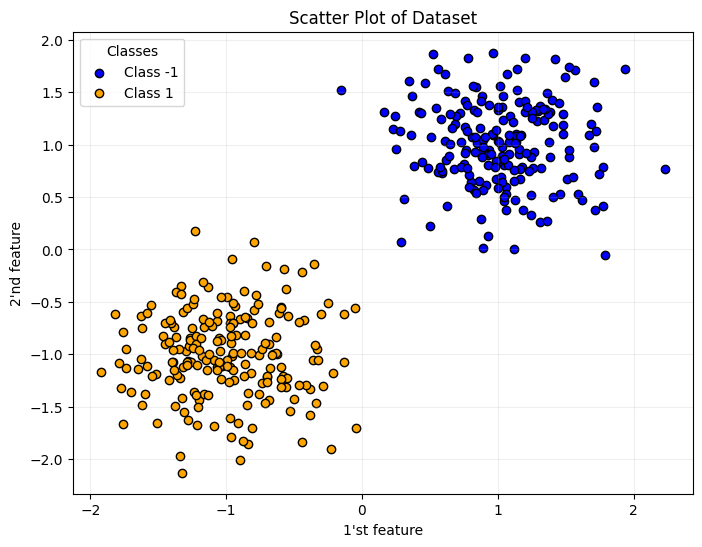

In [ ]:
def relu(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return np.tanh(x)
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc
class Neuron:

    def __init__(self, in_features, threshold, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.threshold = threshold
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad = None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.threshold
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def decision_function(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.threshold
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)

    def gradient_descent(self):
        self.w -= self.eta * self.threshold

    def __repr__(self):
        af_name = self.af.__name__ if self.af is not None else None
        loss_fn_name = self.loss_fn.__name__ if self.loss_fn is not None else None
        return f'Neuron({self.in_features}, {self.threshold}, {af_name}, {loss_fn_name}, {self.n_iter}, {self.eta}, {self.verbose})'

    def parameters(self):
        return {'w': self.w, 'threshold': self.threshold}
plt.figure(figsize=(8, 6))  # Set the figure size
scatter_class_0 = plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', label='Class -1', edgecolors='k', marker='o')
scatter_class_1 = plt.scatter(x[y == 1, 0], x[y == 1, 1], color='orange', label='Class 1', edgecolors='k', marker='o')
plt.xlabel("1'st feature")
plt.ylabel("2'nd feature")
plt.title('Scatter Plot of Dataset')  # Title for the plot
plt.legend(handles=[scatter_class_0, scatter_class_1], title='Classes',loc="upper left")
plt.grid(alpha=0.2)  # Display grid lines
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=93, stratify=y, shuffle=True)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {x_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {x_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')
neuron = Neuron(in_features=2, threshold=0.1, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(x_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')



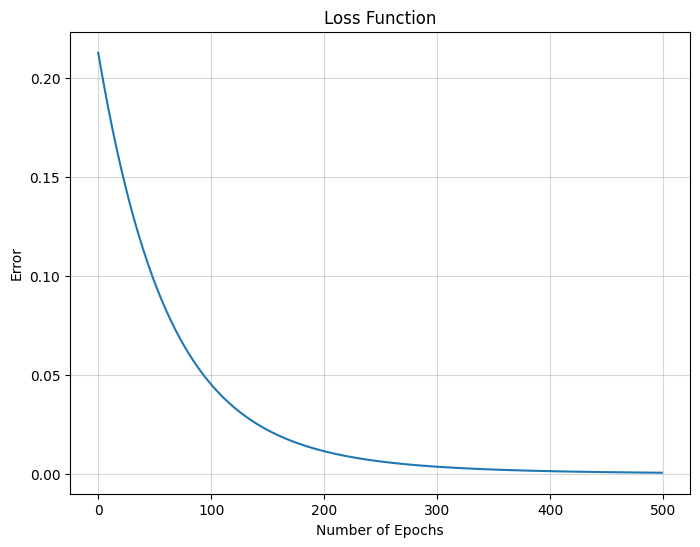

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)


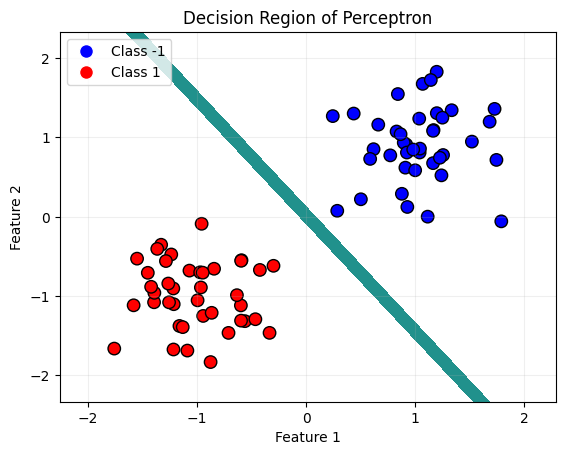

Iter=0, Loss=0.3653
Iter=10, Loss=0.4242
Iter=20, Loss=0.4913
Iter=30, Loss=0.5671
Iter=40, Loss=0.6522
Iter=50, Loss=0.7468
Iter=60, Loss=0.851
Iter=70, Loss=0.9648
Iter=80, Loss=1.088
Iter=90, Loss=1.22
Iter=100, Loss=1.36
Iter=110, Loss=1.508
Iter=120, Loss=1.663
Iter=130, Loss=1.825
Iter=140, Loss=1.992
Iter=150, Loss=2.164
Iter=160, Loss=2.341
Iter=170, Loss=2.521
Iter=180, Loss=2.704
Iter=190, Loss=2.891
Iter=200, Loss=3.079
Iter=210, Loss=3.27
Iter=220, Loss=3.463
Iter=230, Loss=3.657
Iter=240, Loss=3.852
Iter=250, Loss=4.049
Iter=260, Loss=4.246
Iter=270, Loss=4.444
Iter=280, Loss=4.643
Iter=290, Loss=4.843
Iter=300, Loss=5.043
Iter=310, Loss=5.243
Iter=320, Loss=5.444
Iter=330, Loss=5.645
Iter=340, Loss=5.846
Iter=350, Loss=6.047
Iter=360, Loss=6.249
Iter=370, Loss=6.451
Iter=380, Loss=6.653
Iter=390, Loss=6.855
Iter=400, Loss=7.057
Iter=410, Loss=7.259
Iter=420, Loss=7.462
Iter=430, Loss=7.664
Iter=440, Loss=7.866
Iter=450, Loss=8.069
Iter=460, Loss=8.271
Iter=470, Loss=8.474

In [ ]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)
# Define the range of values for x1 and x2
x1_min, x2_min = x_test.min(0) - 0.5
x1_max, x2_max = x_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()
neuron = Neuron(in_features=2, threshold=-0.1, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(x_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')



0.0

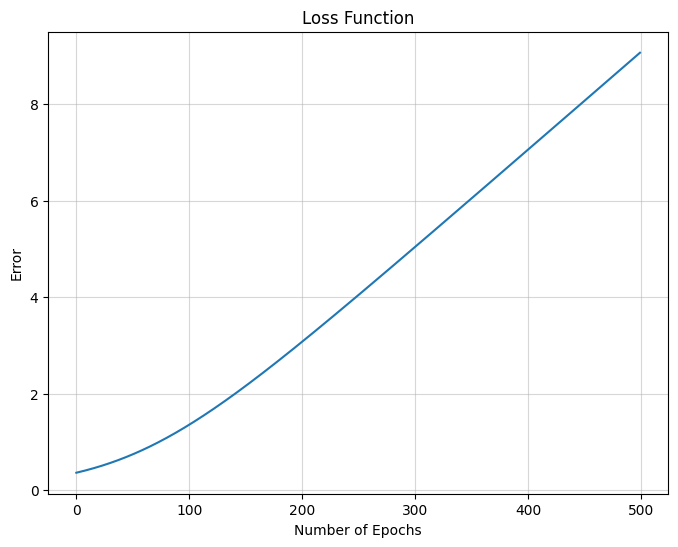

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)


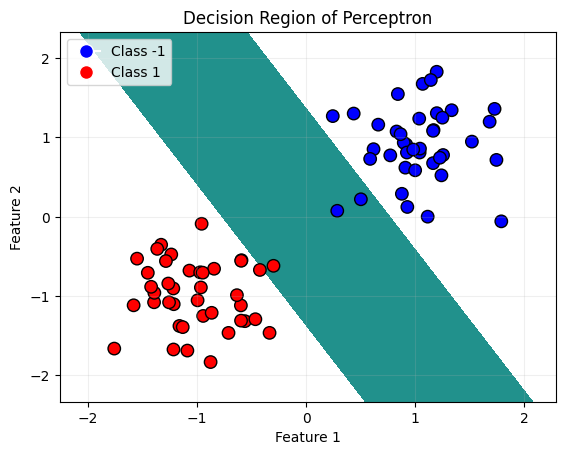

Iter=0, Loss=1.283
Iter=10, Loss=1.283
Iter=20, Loss=1.283
Iter=30, Loss=1.283
Iter=40, Loss=1.283
Iter=50, Loss=1.283
Iter=60, Loss=1.283
Iter=70, Loss=1.283
Iter=80, Loss=1.283
Iter=90, Loss=1.283
Iter=100, Loss=1.283
Iter=110, Loss=1.283
Iter=120, Loss=1.283
Iter=130, Loss=1.283
Iter=140, Loss=1.283
Iter=150, Loss=1.283
Iter=160, Loss=1.283
Iter=170, Loss=1.283
Iter=180, Loss=1.283
Iter=190, Loss=1.283
Iter=200, Loss=1.283
Iter=210, Loss=1.283
Iter=220, Loss=1.283
Iter=230, Loss=1.283
Iter=240, Loss=1.283
Iter=250, Loss=1.283
Iter=260, Loss=1.283
Iter=270, Loss=1.283
Iter=280, Loss=1.283
Iter=290, Loss=1.283
Iter=300, Loss=1.283
Iter=310, Loss=1.283
Iter=320, Loss=1.283
Iter=330, Loss=1.283
Iter=340, Loss=1.283
Iter=350, Loss=1.283
Iter=360, Loss=1.283
Iter=370, Loss=1.283
Iter=380, Loss=1.283
Iter=390, Loss=1.283
Iter=400, Loss=1.283
Iter=410, Loss=1.283
Iter=420, Loss=1.283
Iter=430, Loss=1.283
Iter=440, Loss=1.283
Iter=450, Loss=1.283
Iter=460, Loss=1.283
Iter=470, Loss=1.283
Ite

0.15

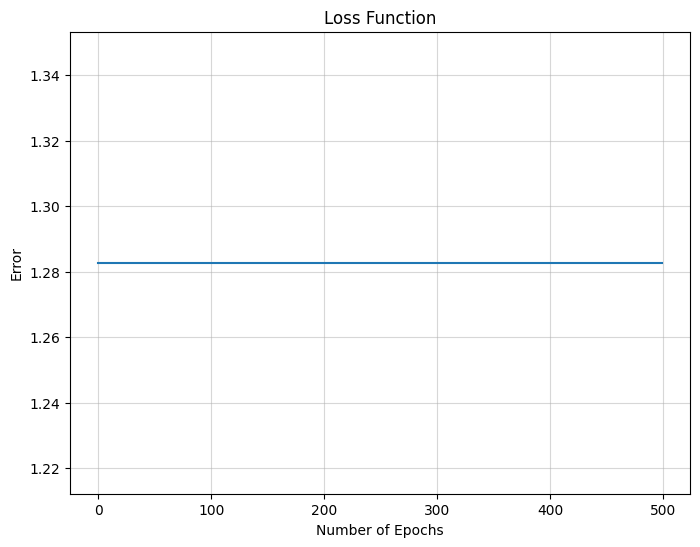

In [ ]:
x1_min, x2_min = x_test.min(0) - 0.5
x1_max, x2_max = x_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()
neuron = Neuron(in_features=2, threshold=0, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(x_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)


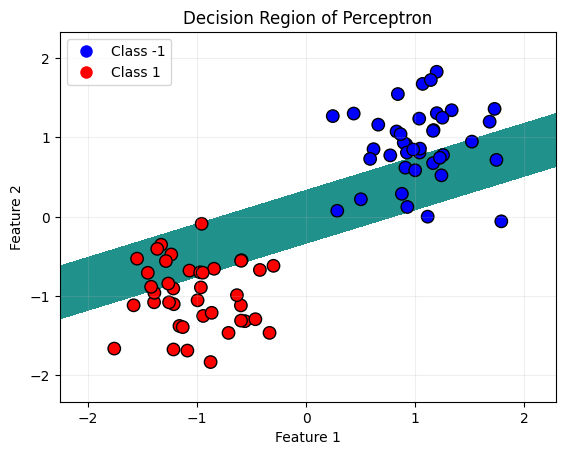

In [ ]:
x1_min, x2_min = x_test.min(0) - 0.5
x1_max, x2_max = x_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()

In [ ]:
#Q2
import numpy as np
import itertools

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):
        if self.weights @ x >= self.threshold:
            return 1
        else:
            return 0

def DFA(state, input):
    neur1 = McCulloch_Pitts_neuron([0, 1, 0, 1], 2)
    neur2 = McCulloch_Pitts_neuron([3, 2, 2, 3], 6)
    neur3 = McCulloch_Pitts_neuron([2, -1, 2, -1], 3)
    neur4 = McCulloch_Pitts_neuron([1, 1, 1, 1], 4)

    z1 = neur1.model(np.array([state[0], state[1], input[0], input[1]]))
    z2 = neur2.model(np.array([state[0], state[1], input[0], input[1]]))
    z3 = neur3.model(np.array([state[0], state[1], input[0], input[1]]))
    z4 = neur4.model(np.array([state[0], state[1], input[0], input[1]]))

    return list([z4, z3, z2, z1])

state_b = [0, 1]
state = list(itertools.product(state_b, state_b))
input = [1, 0]
state2 = list(itertools.product(input, input))
X = list(itertools.product(state, state2))

print('state:', state)
print('\n')
print('X:', X)

state: [(0, 0), (0, 1), (1, 0), (1, 1)]


X: [((0, 0), (1, 1)), ((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 0), (0, 0)), ((0, 1), (1, 1)), ((0, 1), (1, 0)), ((0, 1), (0, 1)), ((0, 1), (0, 0)), ((1, 0), (1, 1)), ((1, 0), (1, 0)), ((1, 0), (0, 1)), ((1, 0), (0, 0)), ((1, 1), (1, 1)), ((1, 1), (1, 0)), ((1, 1), (0, 1)), ((1, 1), (0, 0))]


In [ ]:
import itertools
# inputs
state_b = [0 , 1]
state = list(itertools.product(state_b, state_b))
input = [1, 0]
state2 = list(itertools.product(input, input))
X = list(itertools.product(state, state2))

for i in X:
    res = DFA(i[0],i[1])
    if i == ((0, 1), (1, 0)):
      res[2] = 1
    elif i == ((1, 1), (1, 1)):
      res[2] = 0
    print("DFA with current state as", str(i[0][0]) + str(" ")+str(i[0][1]), "with input as",
          str(i[1][0]) + str(" ")+str(i[1][1]), "goes to next state ", str(res[0]) + str(" ")+str(res[1])+ str(" ")+str(res[2])+ str(" ")+str(res[3]))
    print('i[0]: ', i[0])

    print('\n')

    print('i[1]: ', i[1])


DFA with current state as 0 0 with input as 1 1 goes to next state  0 0 0 0
i[0]:  (0, 0)


i[1]:  (1, 1)
DFA with current state as 0 0 with input as 1 0 goes to next state  0 0 0 0
i[0]:  (0, 0)


i[1]:  (1, 0)
DFA with current state as 0 0 with input as 0 1 goes to next state  0 0 0 0
i[0]:  (0, 0)


i[1]:  (0, 1)
DFA with current state as 0 0 with input as 0 0 goes to next state  0 0 0 0
i[0]:  (0, 0)


i[1]:  (0, 0)
DFA with current state as 0 1 with input as 1 1 goes to next state  0 0 1 1
i[0]:  (0, 1)


i[1]:  (1, 1)
DFA with current state as 0 1 with input as 1 0 goes to next state  0 0 1 0
i[0]:  (0, 1)


i[1]:  (1, 0)
DFA with current state as 0 1 with input as 0 1 goes to next state  0 0 0 1
i[0]:  (0, 1)


i[1]:  (0, 1)
DFA with current state as 0 1 with input as 0 0 goes to next state  0 0 0 0
i[0]:  (0, 1)


i[1]:  (0, 0)
DFA with current state as 1 0 with input as 1 1 goes to next state  0 1 1 0
i[0]:  (1, 0)


i[1]:  (1, 1)
DFA with current state as 1 0 with input as 1 

In [1]:
#Q3
#part 1
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 22.8MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [2]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation


In [3]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


Streaming output truncated to the last 5000 lines.
x4220: -0.500, y4220: -0.500
x4221: -0.500, y4221: -0.500
x4222: -0.500, y4222: -0.500
x4223: -0.500, y4223: -0.500
x4224: -0.500, y4224: -0.500
x4225: -0.500, y4225: -0.500
x4226: -0.500, y4226: -0.500
x4227: -0.500, y4227: -0.500
x4228: -0.500, y4228: -0.500
x4229: -0.500, y4229: -0.500
x4230: -0.500, y4230: -0.500
x4231: -0.500, y4231: -0.500
x4232: -0.500, y4232: -0.500
x4233: -0.500, y4233: -0.500
x4234: -0.500, y4234: -0.500
x4235: -0.500, y4235: -0.500
x4236: -0.500, y4236: -0.500
x4237: -0.500, y4237: -0.500
x4238: -0.500, y4238: -0.500
x4239: -0.500, y4239: -0.500
x4240: -0.500, y4240: -0.500
x4241: -0.500, y4241: -0.500
x4242: -0.500, y4242: -0.500
x4243: -0.500, y4243: -0.500
x4244: -0.500, y4244: -0.500
x4245: -0.500, y4245: -0.500
x4246: -0.500, y4246: -0.500
x4247: -0.500, y4247: -0.500
x4248: 0.500, y4248: -0.500
x4249: 0.500, y4249: -0.500
x4250: 0.500, y4250: -0.500
x4251: 0.500, y4251: -0.500
x4252: 0.500, y4252: -0.5

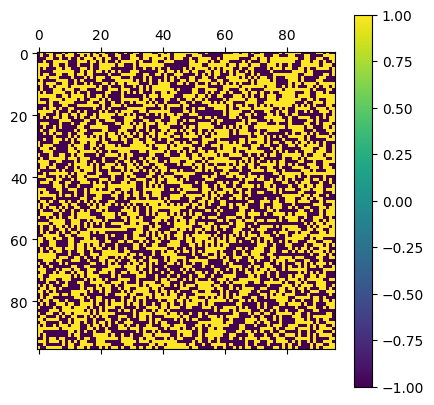

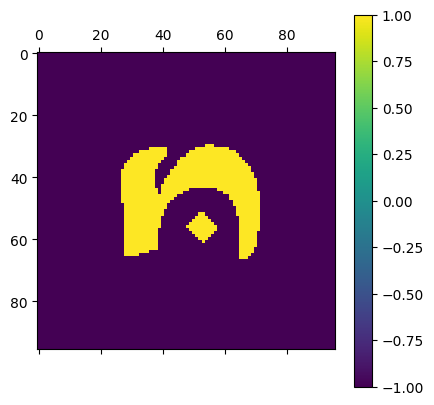

In [4]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/noisy5.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:.3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
for idx, output_vector in enumerate(y):
    print(f'Iteration {idx + 1}:', *output_vector)
    print('Weights (x, y):')
    for j in range(len(x[0])):
        print(f'x{j}: {w[0][j]:.3f}, y{j}: {w[1][j]:.3f}')
    print('Error:', norm(y[idx], p))
    print()

print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

In [5]:
#part 3
from PIL import Image, ImageDraw
import random

def getNoisyBinaryImage(input_path, output_path, num_missing_points, conversion_percentage):
    """
    Add noise to an image, generate missing points, and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
        num_missing_points (int): The number of missing points to generate.
        conversion_percentage (float): The percentage of black pixels to convert to white.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 50

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Convert some black pixels to white based on the conversion percentage.
            if (red, green, blue) == (0, 0, 0) and random.random() < conversion_percentage:
                red, green, blue = 255, 255, 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Generate missing points in the image.
    for _ in range(num_missing_points):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        draw.point((x, y), (255, 255, 255))  # Set the missing point to white

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        # Specify the number of missing points and conversion percentage here
        getNoisyBinaryImage(image_path, noisy_image_path, num_missing_points=500, conversion_percentage=0.1)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

# Generate noisy images with missing points and black-to-white conversion
generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


noisy5.jpg
Output Vectors Table:
0.008635 0.008336 0.008347 0.008750 0.009149 
0.000000 0.000000 0.000000 0.000000 0.000000 
0.000000 0.000000 0.000000 0.000000 0.000000 
Last Output Vector: 3.336400000000009e-16 0 0 4.992399999999987e-16 1.0737999999999986e-15
The highest positive output value is associated with class 5


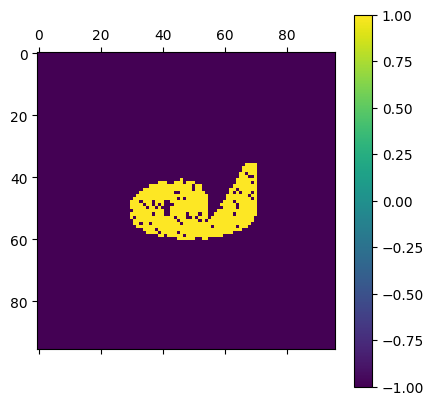

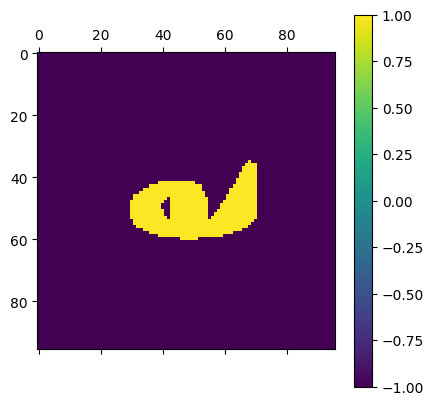

In [6]:
from pylab import *
from math import sqrt
import matplotlib.pyplot as plt
import os

# Define the path to the input image
IMAGE_PATH = "/content/noisy5.jpg"

def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)

# List of paths to example images
path = [
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg',
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

In [ ]:
#Q4
#part1
!pip install --upgrade --no-cache-dir gdown
!gdown 1V16EH65xbiMNkfGX7--0C5-8Q5fOmEpn


Downloading...
From: https://drive.google.com/uc?id=1V16EH65xbiMNkfGX7--0C5-8Q5fOmEpn
To: /content/data.csv
100% 527k/527k [00:00<00:00, 116MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data.dropna(inplace=True)
num = data.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

<Axes: >

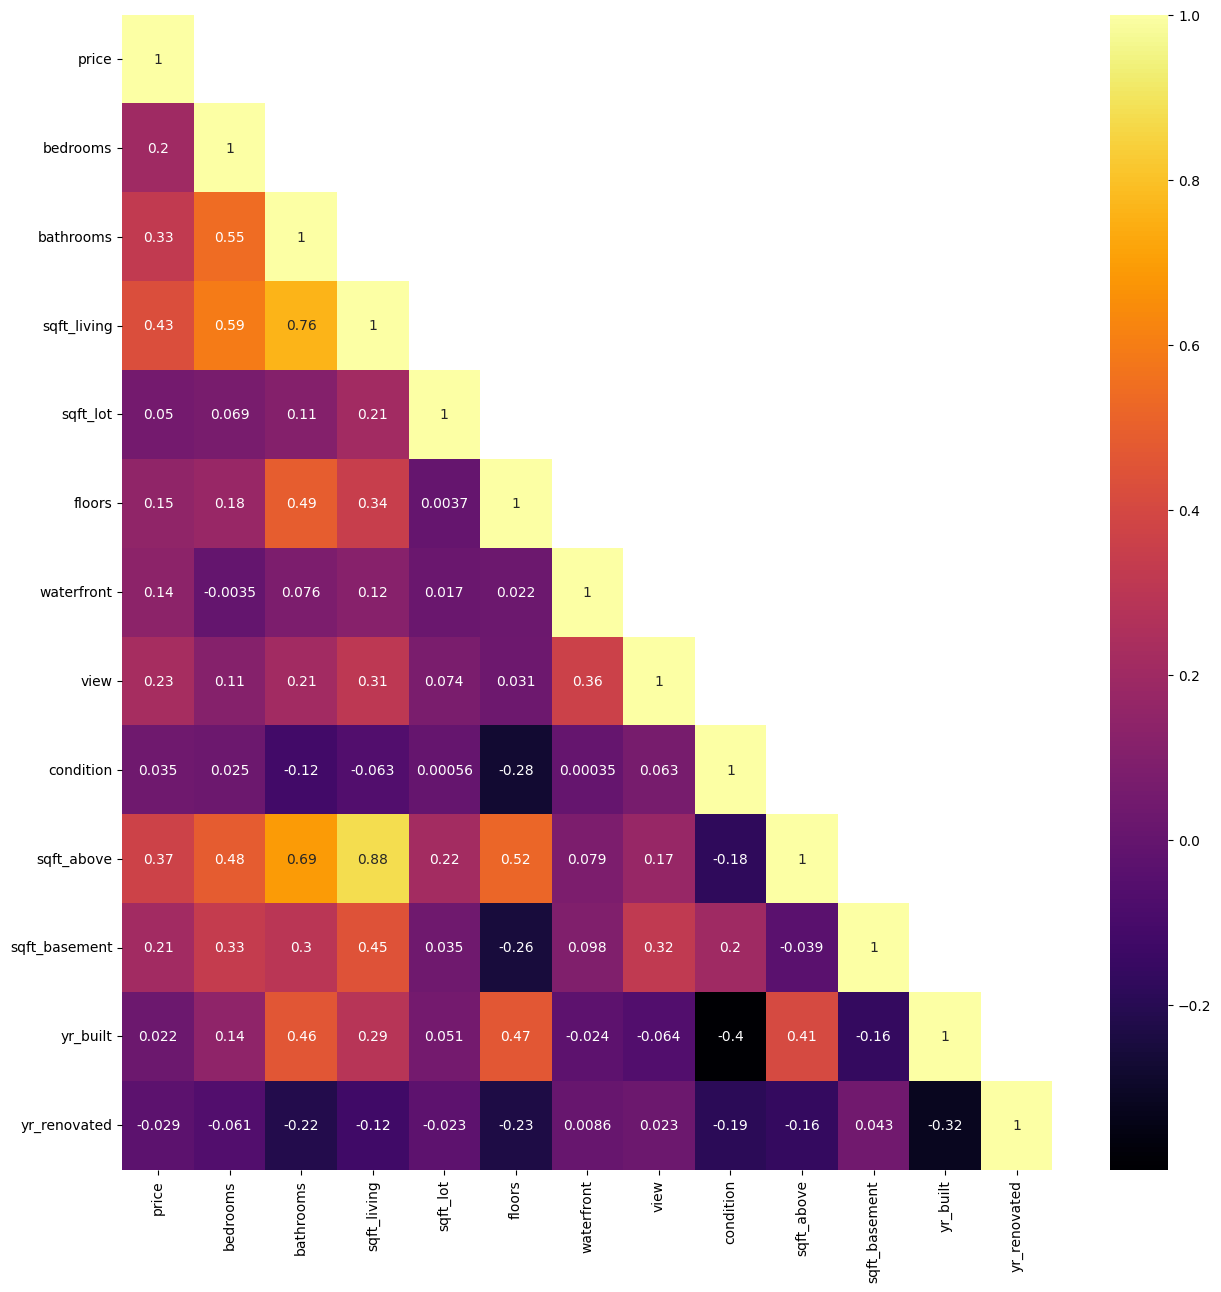

In [ ]:
#part 2
plt.figure(figsize=(15, 15))
sns.heatmap(data[num].corr(), annot=True, cmap='inferno', mask=np.triu(data[num].corr(), k=1))


In [ ]:
correlation_matrix = data.corr()['price'].sort_values(ascending=False)
correlation_matrix


price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

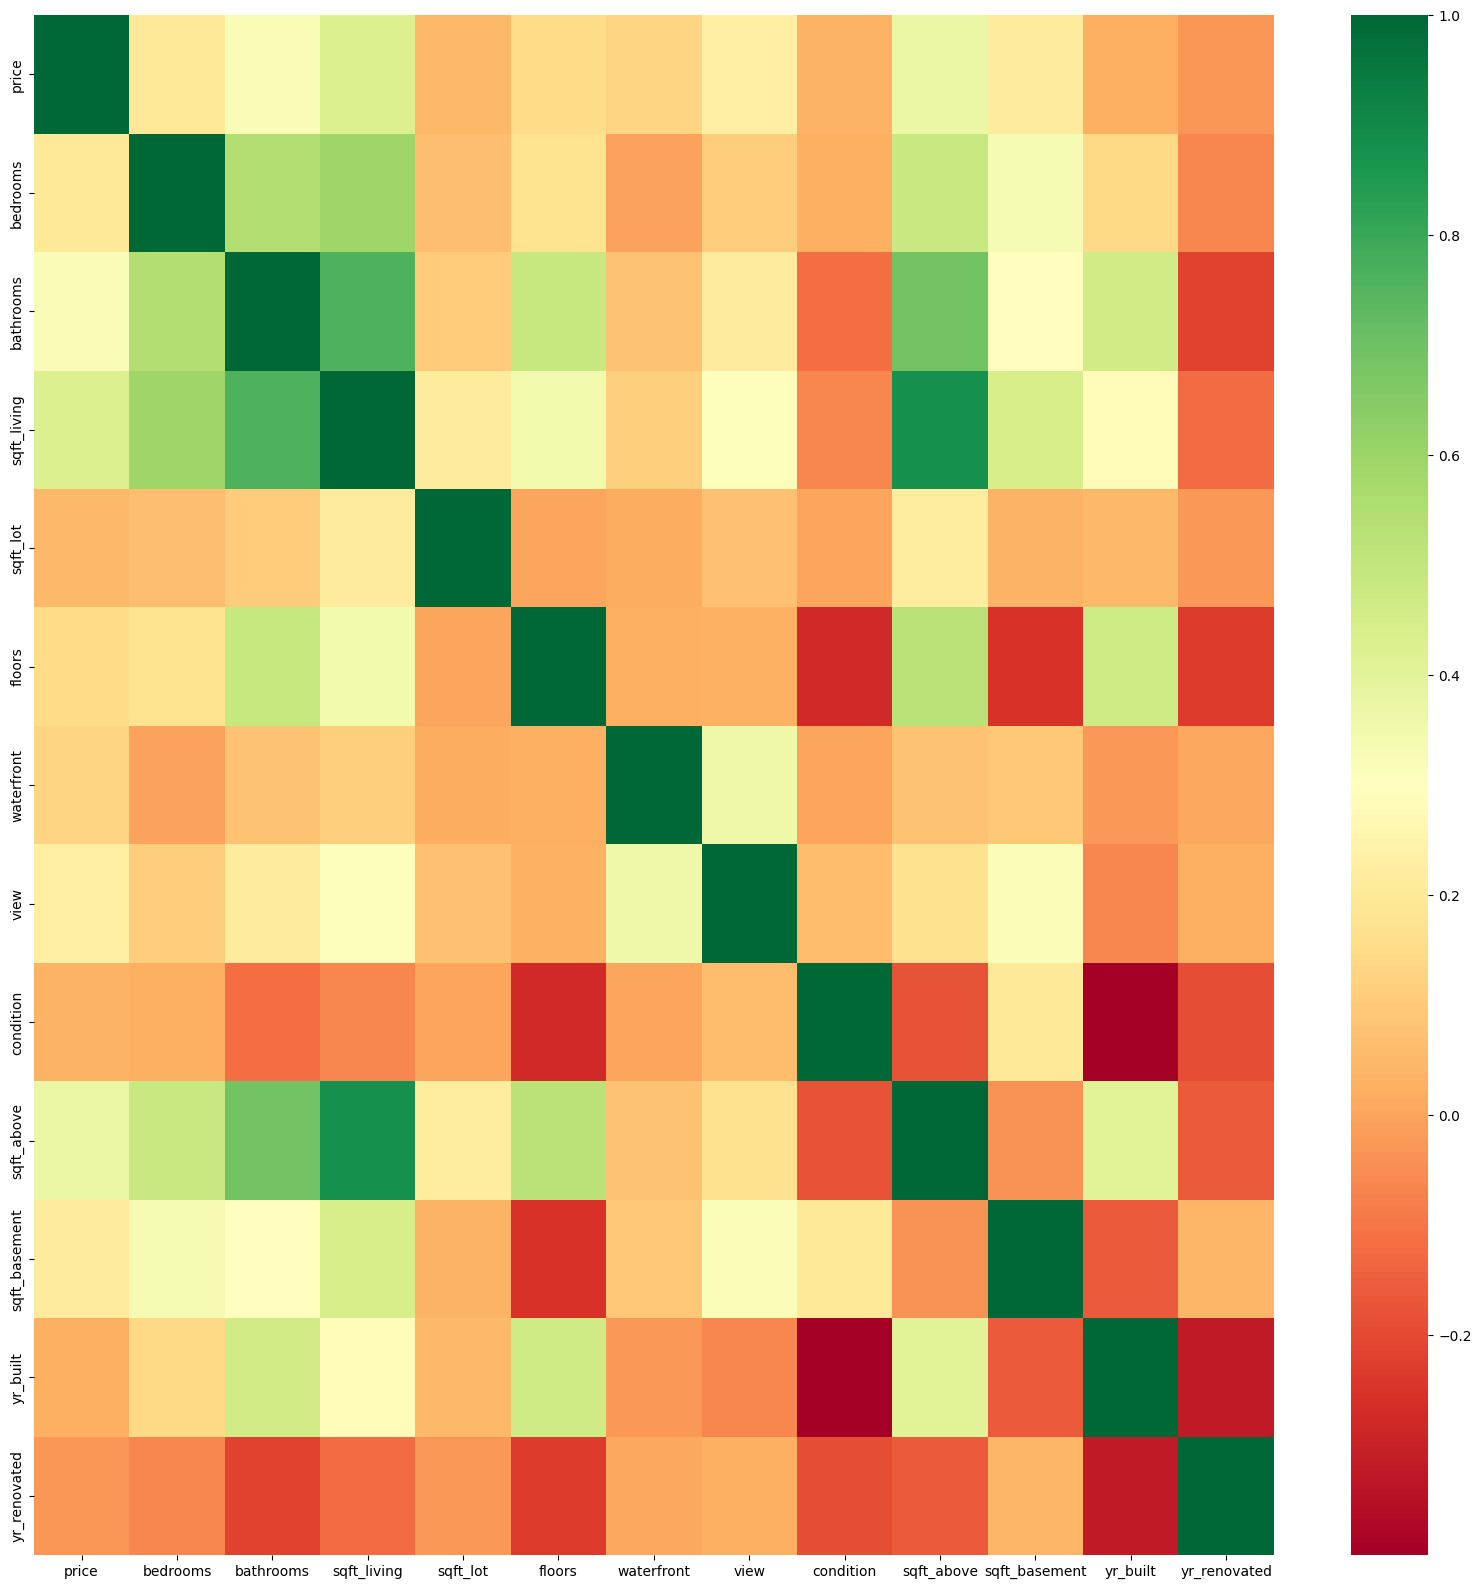

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap="RdYlGn")
plt.show()


Text(0.5, 1.0, 'yr_renovated Interval')

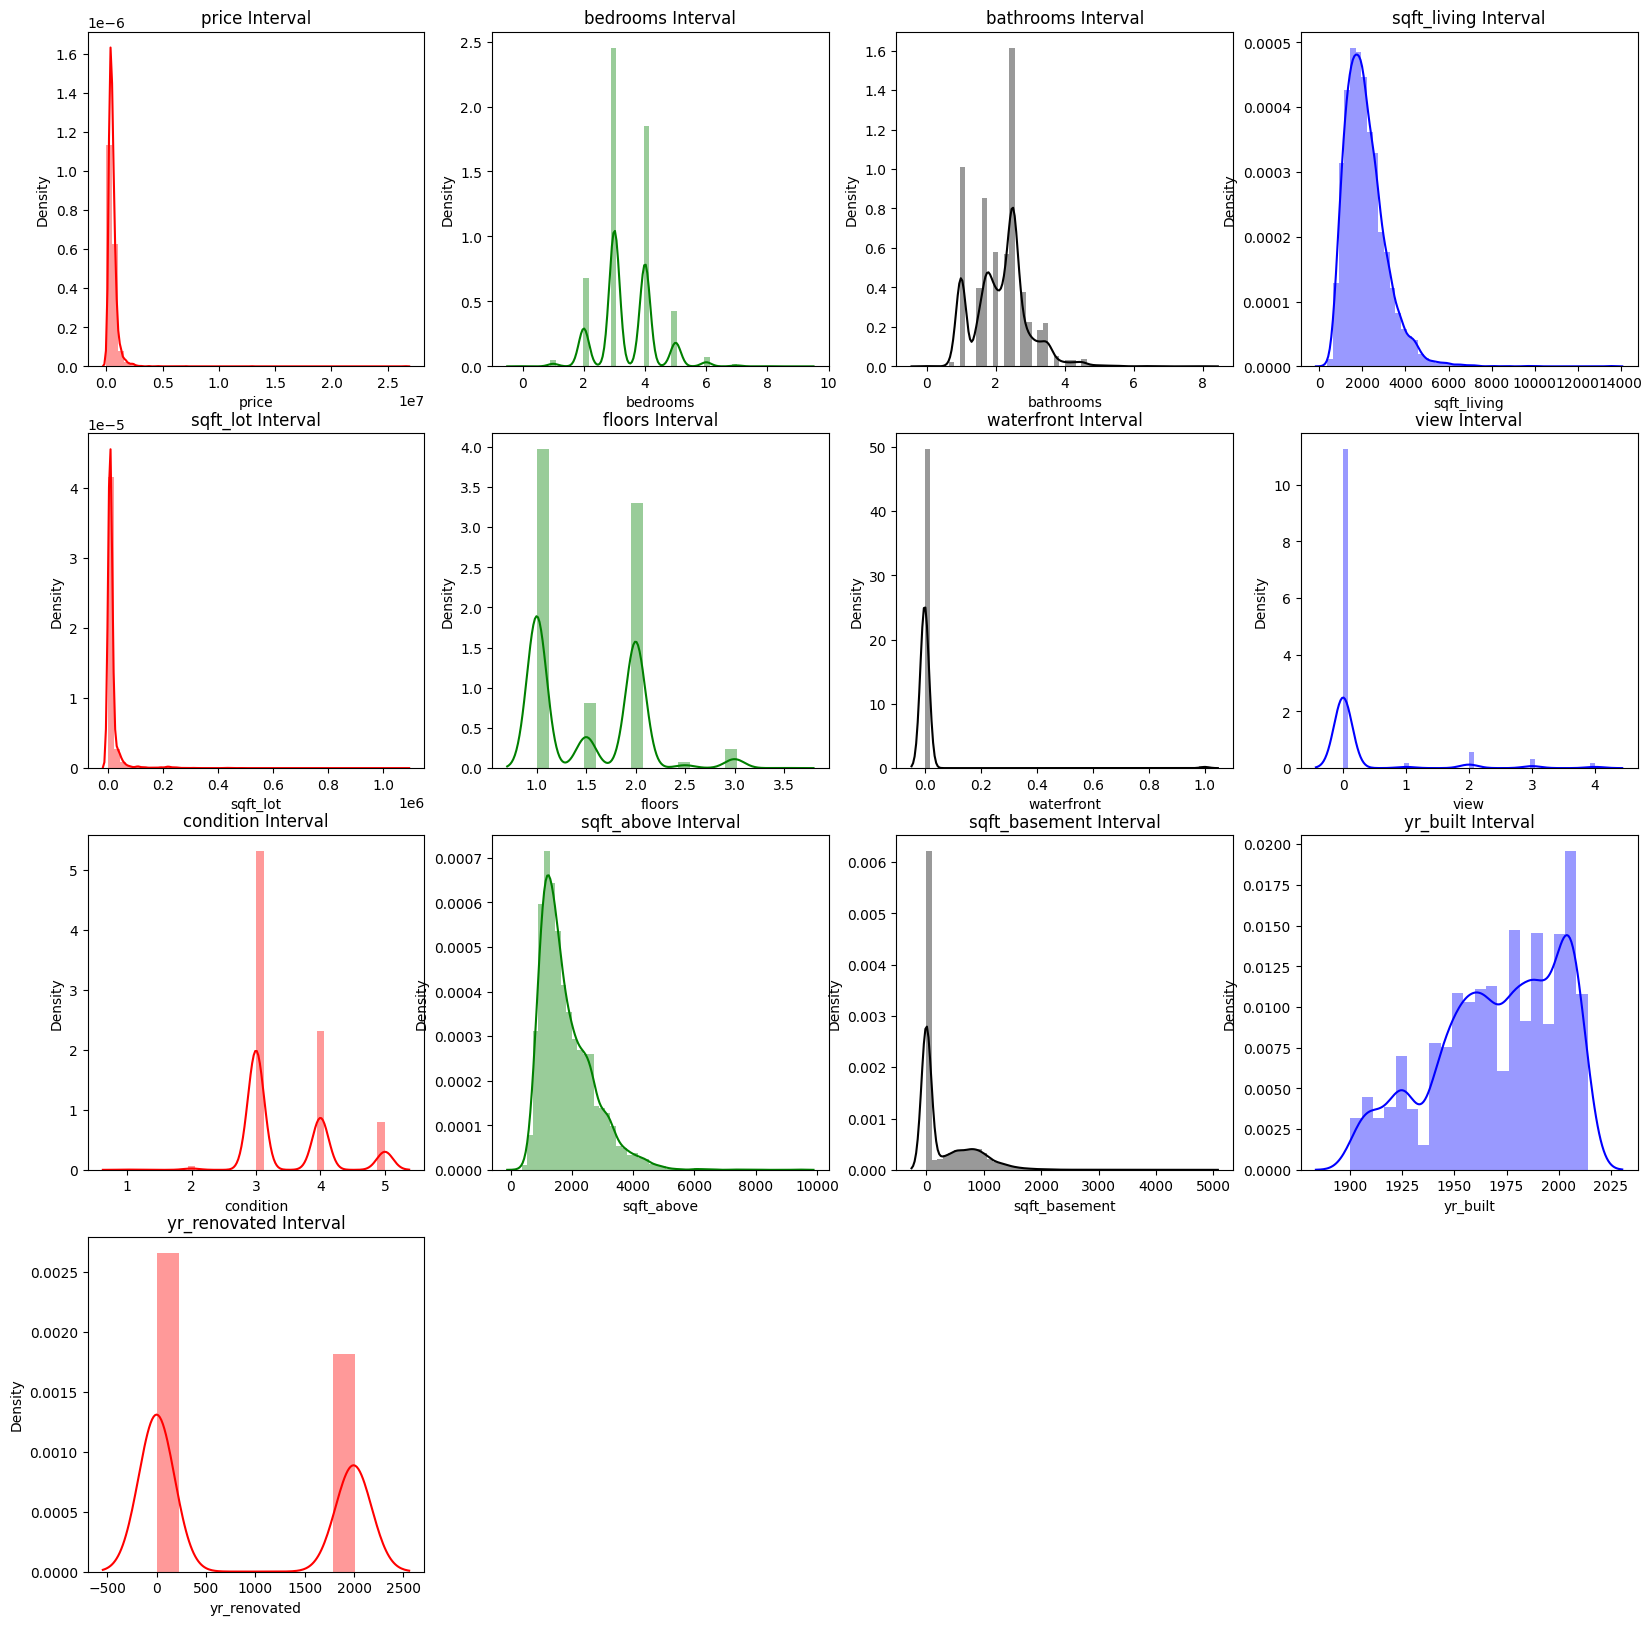

In [ ]:
#part 3
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
sns.distplot(data['price'], color="red").set_title('price Interval')

plt.subplot(4,4,2)
sns.distplot(data['bedrooms'], color="green").set_title('bedrooms Interval')

plt.subplot(4,4,3)
sns.distplot(data['bathrooms'], color="black").set_title('bathrooms Interval')

plt.subplot(4,4,4)
sns.distplot(data['sqft_living'], color="blue").set_title('sqft_living Interval')

plt.subplot(4,4,5)
sns.distplot(data['sqft_lot'], color="red").set_title('sqft_lot Interval')

plt.subplot(4,4,6)
sns.distplot(data['floors'], color="green").set_title('floors Interval')

plt.subplot(4,4,7)
sns.distplot(data['waterfront'], color="black").set_title('waterfront Interval')

plt.subplot(4,4,8)
sns.distplot(data['view'], color="blue").set_title('view Interval')

plt.subplot(4,4,9)
sns.distplot(data['condition'], color="red").set_title('condition Interval')

plt.subplot(4,4,10)
sns.distplot(data['sqft_above'], color="green").set_title('sqft_above Interval')

plt.subplot(4,4,11)
sns.distplot(data['sqft_basement'], color="black").set_title('sqft_basement Interval')

plt.subplot(4,4,12)
sns.distplot(data['yr_built'], color="blue").set_title('yr_built Interval')

plt.subplot(4,4,13)
sns.distplot(data['yr_renovated'], color="red").set_title('yr_renovated Interval')


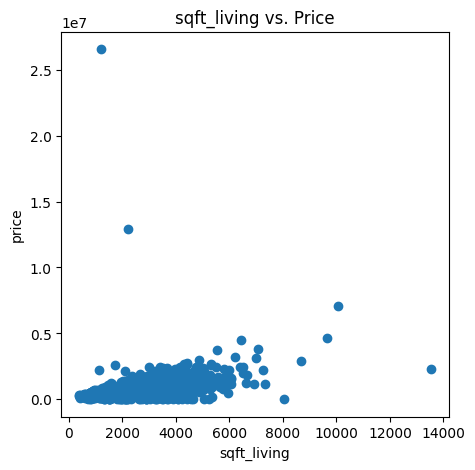

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=data)
plt.xlabel('sqft_living')
plt.title('sqft_living vs. Price')
plt.ylabel('price')
plt.show()

In [ ]:
#part 4
date = data["date"]

# Count the occurrences of each unique car name
date.value_counts()

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

# Extract year and month
df['year'] = pd.to_datetime(df.iloc[:, 0]).dt.year
df['month'] = pd.to_datetime(df.iloc[:, 0]).dt.month

# Drop the original date column
df.drop(df.columns[0], axis=1, inplace=True)

# Display the modified DataFrame
print(df)


             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

In [ ]:
#part 5
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = l1.fit_transform(df[i])

df
X = df.drop(["price"], axis=1)  # Input data
Y = df["price"]                  # Output data
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0,2014,5
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,2014,5
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,2014,5
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,2014,5
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0,2014,7
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0,2014,7
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0,2014,7
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0,2014,7


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=83)
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (3680, 18)
X Test Scaler :  (920, 18)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


In [ ]:
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

# Loop through the elements of y_train
for i in range(x_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

In [ ]:
#part 6
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                950       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2511 (9.81 KB)
Trainable params: 2511 (9.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)
loss = model_2.evaluate(x_test , y_test)
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)

rscore_2

29/29 [==============================] - 1s 5ms/step


0.18170540039453498

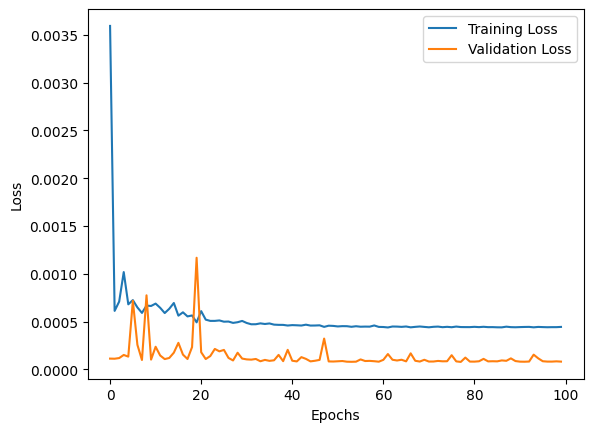

In [ ]:
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

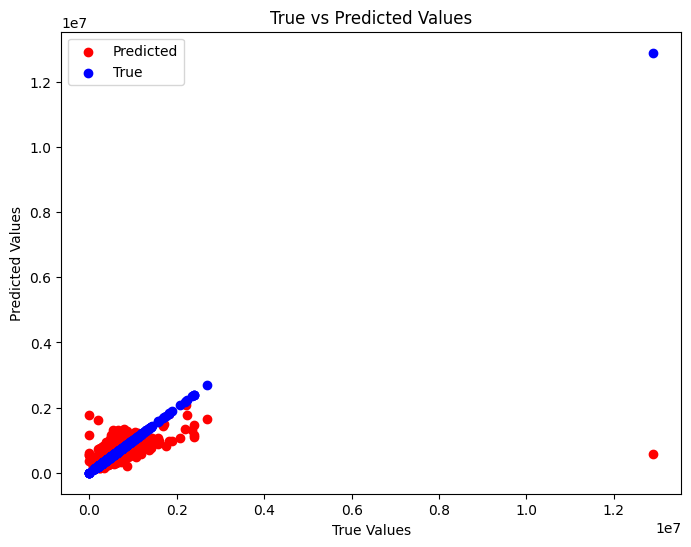

In [ ]:
import matplotlib.pyplot as plt

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_2)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# PART 7
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='linear', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='linear'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                950       
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2511 (9.81 KB)
Trainable params: 2511 (9.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer = 'sgd',loss = 'mae')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

29/29 [==============================] - 0s 1ms/step


0.061016778759341084

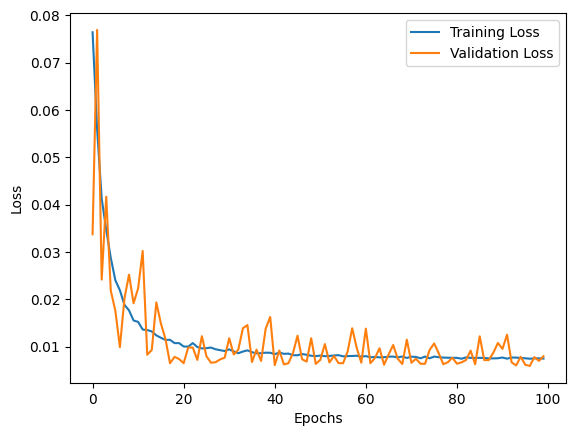

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

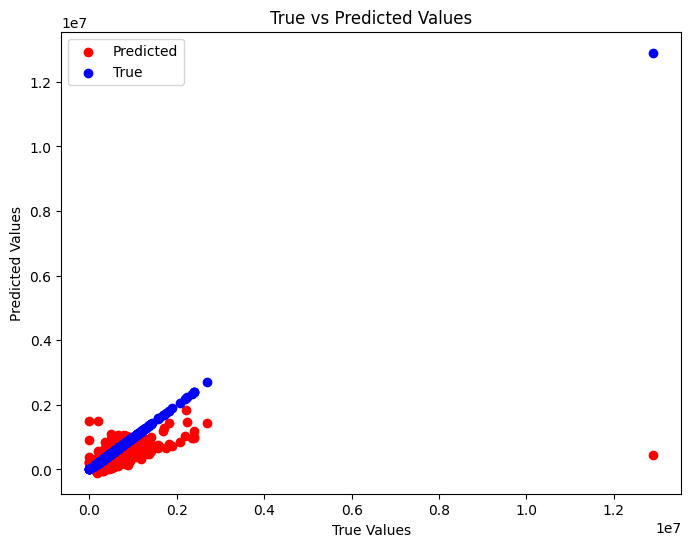

In [ ]:
import matplotlib.pyplot as plt

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_2)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

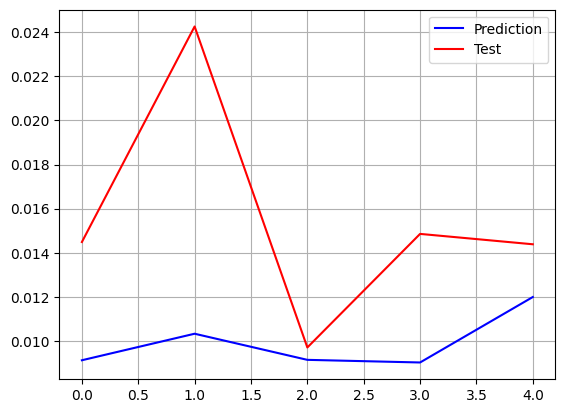

In [ ]:
# PART 8
random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

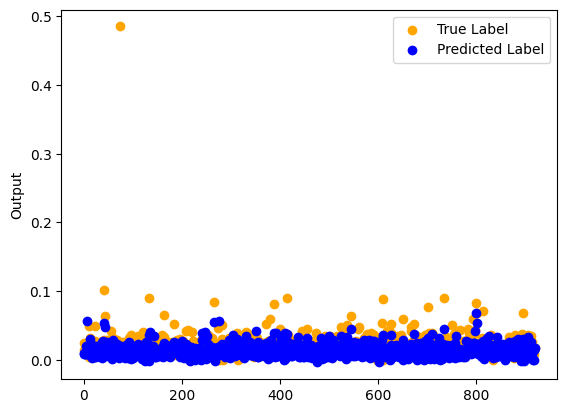

In [ ]:
a = maximum - minimum

# Convert predicted values back to the original scale
y_pred_true = a * (y_pred_2)
y_pred_true_1 = y_pred_true + minimum
# Create a scatter plot for true and predicted outputs
plt.scatter(range(len(y_test)), y_test, color="orange")  # True labels in orange
plt.scatter(range(len(y_test)), y_pred_2, color="blue")  # Predicted labels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()

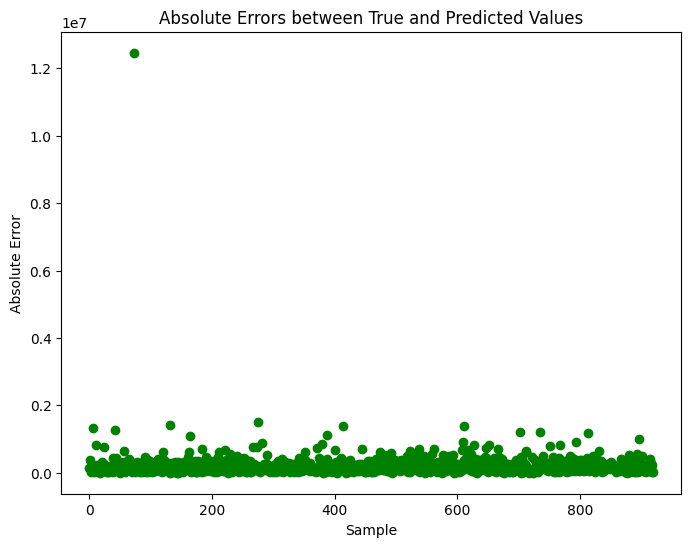

In [ ]:
import numpy as np

# Calculate errors between true and predicted values
errors = np.abs(y_test_unscaled - y_pred_unscaled)

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Absolute Errors between True and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.show()


In [ ]:
model_3 = Sequential()

# Add the first hidden layer with 50 neurons and ReLU activation function
model_3.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_3.add(Dense(30, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                950       
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2801 (10.94 KB)
Trainable params: 2801 (10.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam', loss='mse')

history = model_3.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)
loss = model_3.evaluate(x_test , y_test)
y_pred_3 = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3)

rscore_3

29/29 [==============================] - 0s 1ms/step


0.13696532990382304

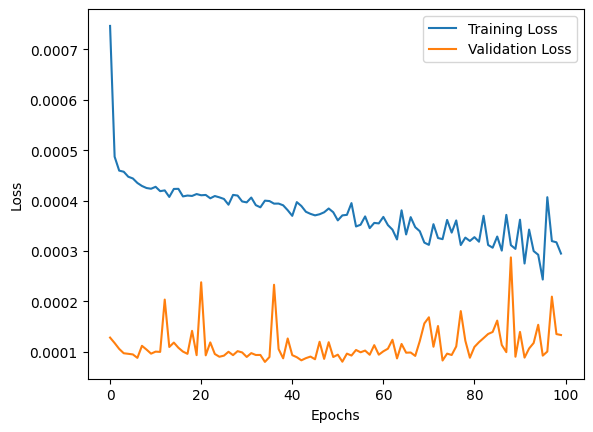

In [ ]:
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

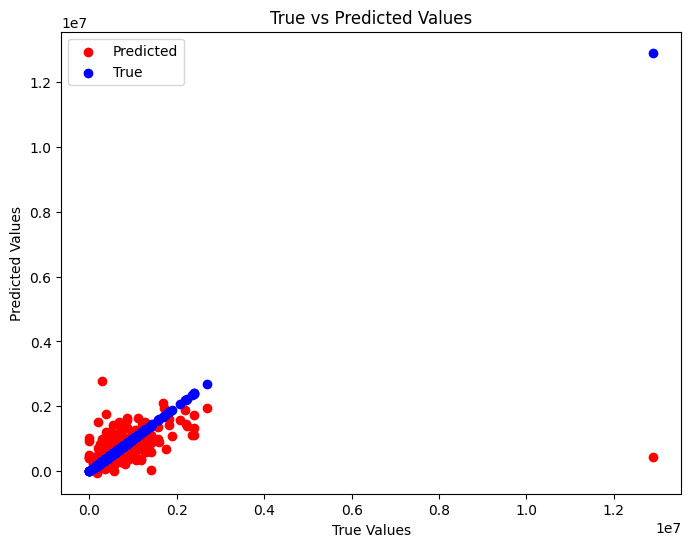

In [ ]:
import matplotlib.pyplot as plt

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_3)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

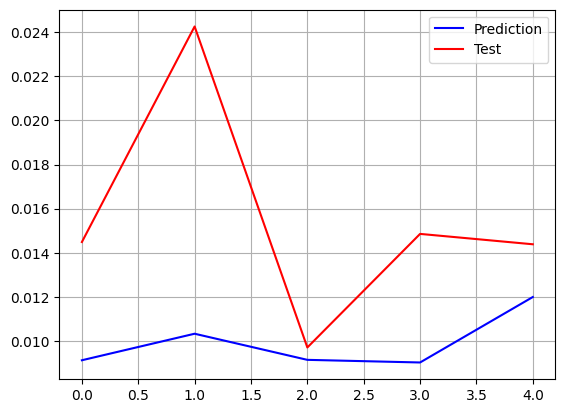

In [ ]:
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()


In [14]:
#Q5
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns

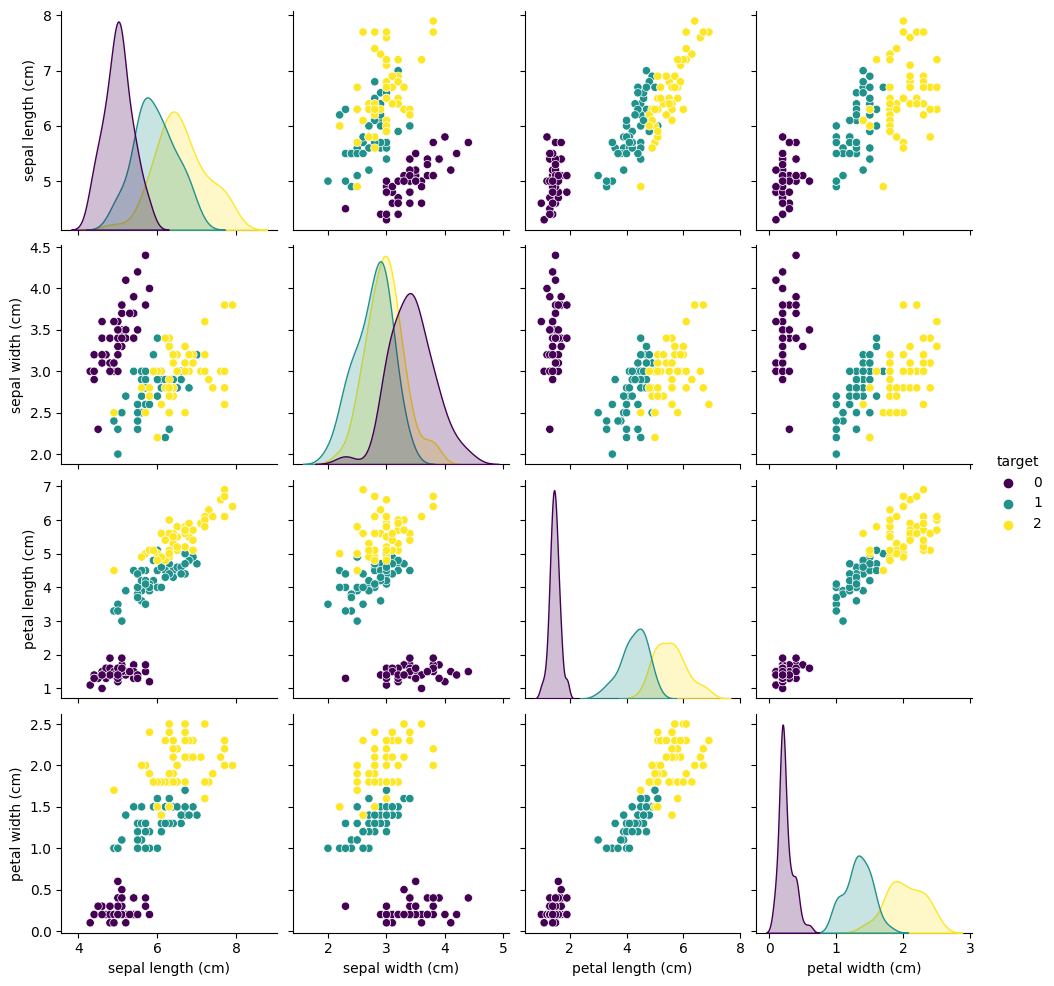

In [15]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['target'] = target
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.show()

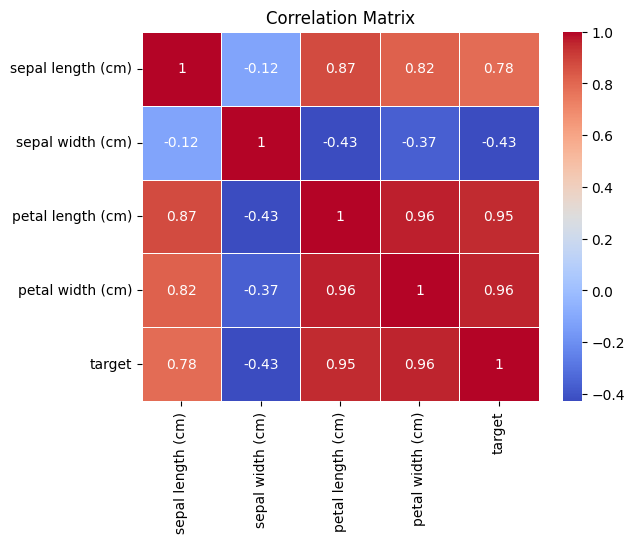

In [16]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
Accuracy: 0.3000
Precision: 0.0900
Recall: 0.3000
F1 Score: 0.1385


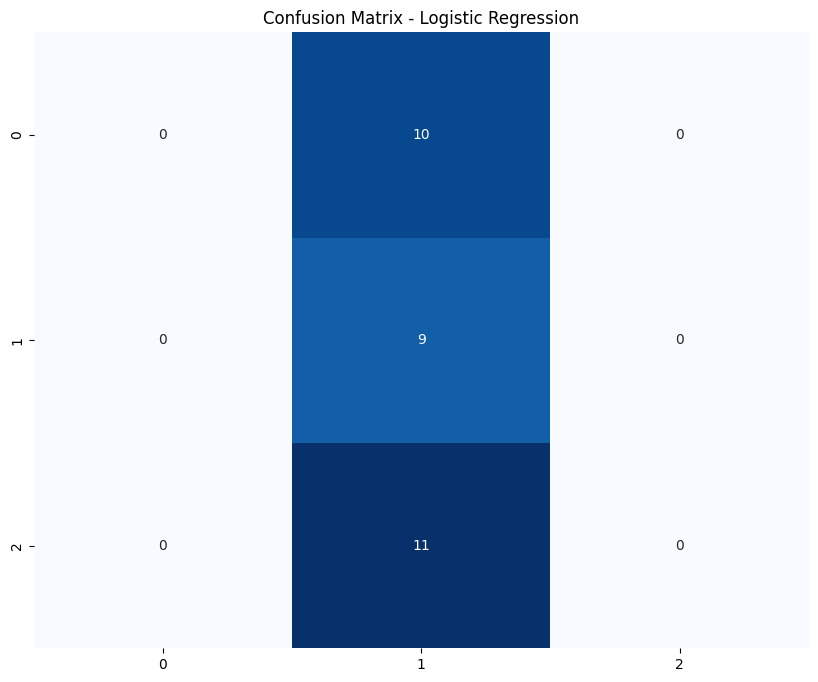


MLP Metrics:
Accuracy: 0.8333
Precision: 0.8854
Recall: 0.8333
F1 Score: 0.8167


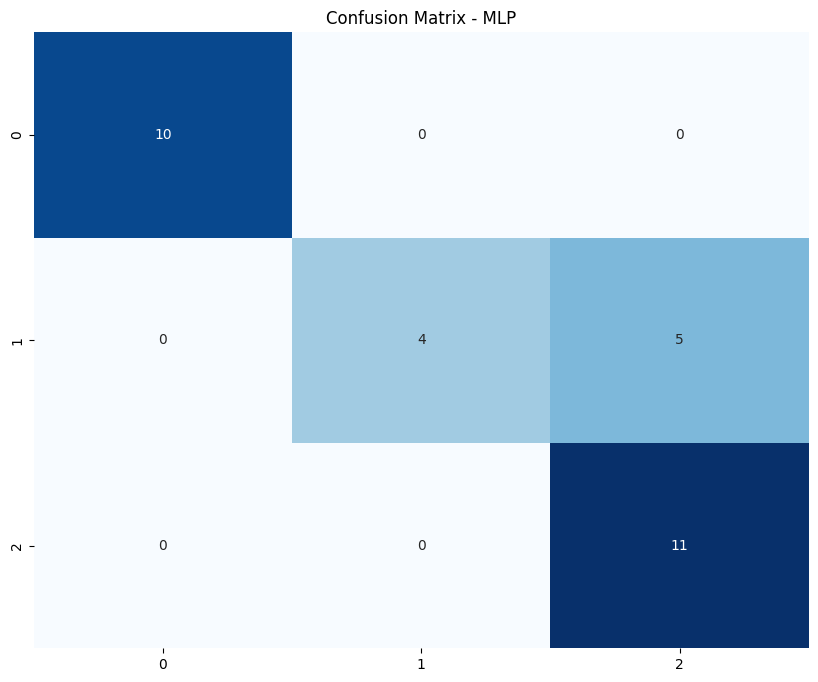


RBF Neural Network Metrics:
Accuracy: 0.9667
Precision: 0.9700
Recall: 0.9667
F1 Score: 0.9668


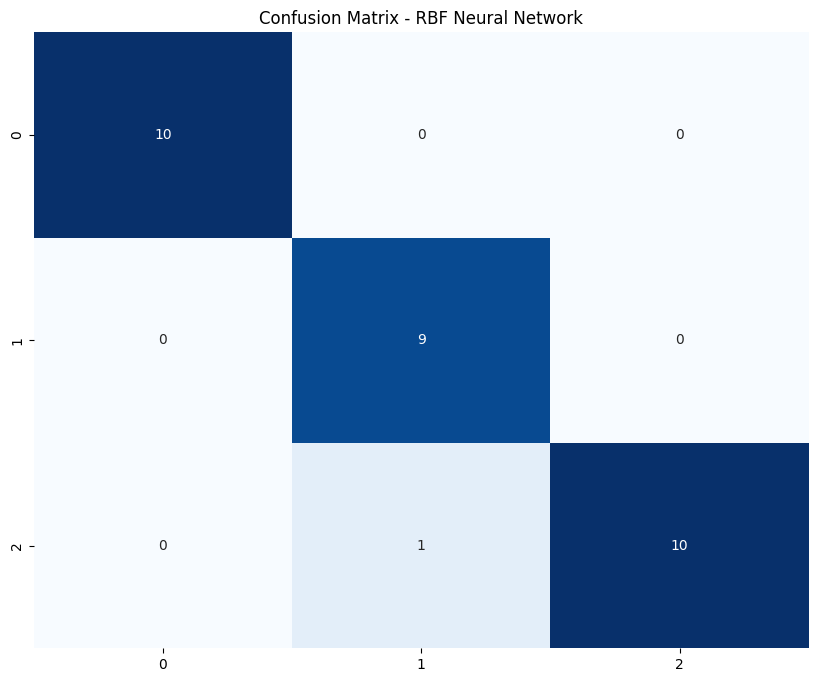

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=23)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Adding bias term
X_eval = np.hstack((X_eval, np.ones((X_eval.shape[0], 1))))  # Adding bias term

# Logistic Regression
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            z = np.dot(X, self.weights)
            predictions = self.sigmoid(z)
            error = y - predictions

            gradient = np.dot(X.T, error)
            self.weights += self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.weights)
        predictions = self.sigmoid(z)
        return np.round(predictions)

# Multi-Layer Perceptron (MLP)
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden)
            hidden_layer_output = self.sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
            output_layer_output = self.softmax(output_layer_input)

            # Backward pass
            output_error = y - output_layer_output
            output_delta = output_error

            hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
            hidden_layer_delta = hidden_layer_error * (hidden_layer_output * (1 - hidden_layer_output))

            # Update weights
            self.weights_hidden_output += self.learning_rate * hidden_layer_output.T.dot(output_delta)
            self.weights_input_hidden += self.learning_rate * X.T.dot(hidden_layer_delta)

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden)
        hidden_layer_output = self.sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        output_layer_output = self.softmax(output_layer_input)

        return np.argmax(output_layer_output, axis=1)

# Radial Basis Function (RBF) Neural Network
class RBFNN:
    def __init__(self, num_centers, learning_rate=0.01, epochs=1000):
        self.num_centers = num_centers
        self.learning_rate = learning_rate
        self.epochs = epochs

    def gaussian_rbf(self, x, c, sigma):
        return np.exp(-np.linalg.norm(x - c) / (2 * sigma**2))

    def train(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.num_centers, replace=False)]
        self.sigma = np.std(X)

        self.weights = np.random.rand(self.num_centers)

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                phi = np.array([self.gaussian_rbf(X[i], c, self.sigma) for c in self.centers])
                prediction = np.dot(phi, self.weights)
                error = y[i] - prediction

                # Update weights
                self.weights += self.learning_rate * error * phi

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            phi = np.array([self.gaussian_rbf(X[i], c, self.sigma) for c in self.centers])
            prediction = np.dot(phi, self.weights)
            predictions.append(prediction)

        return np.round(predictions)

# Convert target labels to one-hot encoding for MLP
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((len(labels), num_classes))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

# Convert target labels to integers for RBFNN
def convert_to_integer_labels(labels):
    label_map = {label: i for i, label in enumerate(np.unique(labels))}
    return np.array([label_map[label] for label in labels])

# One-hot encode target labels for MLP
y_train_one_hot = one_hot_encode(y_train, len(np.unique(y_train)))
y_eval_one_hot = one_hot_encode(y_eval, len(np.unique(y_eval)))

# Logistic Regression
lr_model = LogisticRegression()
lr_model.train(X_train, y_train)
lr_pred = lr_model.predict(X_eval)

# MLP
mlp_model = MLP(input_size=X_train.shape[1], hidden_size=10, output_size=len(np.unique(y_train)), epochs=1000)
mlp_model.train(X_train, y_train_one_hot)
mlp_pred = mlp_model.predict(X_eval)

# RBF Neural Network
num_rbf_centers = 10
rbf_model = RBFNN(num_centers=num_rbf_centers, epochs=1000)
rbf_model.train(X_train, convert_to_integer_labels(y_train))
rbf_pred = rbf_model.predict(X_eval)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_eval, lr_pred)
lr_precision = precision_score(y_eval, lr_pred, average='weighted')
lr_recall = recall_score(y_eval, lr_pred, average='weighted')
lr_f1 = f1_score(y_eval, lr_pred, average='weighted')

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

# Confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_eval, lr_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Evaluate MLP
mlp_accuracy = accuracy_score(y_eval, mlp_pred)
mlp_precision = precision_score(y_eval, mlp_pred, average='weighted')
mlp_recall = recall_score(y_eval, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_eval, mlp_pred, average='weighted')

print("\nMLP Metrics:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")

# Confusion matrix for MLP
mlp_cm = confusion_matrix(y_eval, mlp_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP")
plt.show()

# Evaluate RBF Neural Network
rbf_accuracy = accuracy_score(y_eval, rbf_pred)
rbf_precision = precision_score(y_eval, rbf_pred, average='weighted')
rbf_recall = recall_score(y_eval, rbf_pred, average='weighted')
rbf_f1 = f1_score(y_eval, rbf_pred, average='weighted')

print("\nRBF Neural Network Metrics:")
print(f"Accuracy: {rbf_accuracy:.4f}")
print(f"Precision: {rbf_precision:.4f}")
print(f"Recall: {rbf_recall:.4f}")
print(f"F1 Score: {rbf_f1:.4f}")

# Confusion matrix for RBF Neural Network
rbf_cm = confusion_matrix(y_eval, rbf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(rbf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - RBF Neural Network")
plt.show()